<a href="https://colab.research.google.com/github/NiyazovIlia/neural_networks/blob/lesson-8/neural_networks_lesson_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Flatten
import matplotlib.pyplot as plt
from google.colab import files

In [2]:
train, _ = tfds.load('cats_vs_dogs', split=['train[:80%]'], with_info=True, as_supervised=True)
test, _ = tfds.load('cats_vs_dogs', split=['train[80%:]'], with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incomplete9MXGIP/cats_vs_dogs-train.tfrecord


  0%|          | 0/23262 [00:00<?, ? examples/s]

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


In [3]:
SIZE = 224
def resize_image(img, label):
  img = tf.cast(img, tf.float32)
  img = tf.image.resize(img, (SIZE, SIZE))
  img = img / 255.0
  return img, label

In [4]:
train_resized = train[0].map(resize_image)
train_batches = train_resized.shuffle(1000).batch(16)

test_resized = test[0].map(resize_image)
test_batches = test_resized.shuffle(1000).batch(16)

In [5]:
base_layers = tf.keras.applications.NASNetMobile(input_shape=(SIZE, SIZE, 3), include_top=False)
base_layers.trainable = False

model = tf.keras.Sequential([
    base_layers,
    Flatten(),
    Dense(256, activation="relu"),
    Dropout(0.3),
    Dense(128, activation="relu"),
    Dropout(0.3),
    Dense(64, activation="relu"),
    Dropout(0.3),
    Dense(1, activation="sigmoid"),
    ])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

20004864/19993432 [==============================] - 1s 0us/step


In [6]:
model.fit(train_batches, batch_size=16, epochs=5, validation_data=test_batches)

Epoch 1/5
1164/1164 [==============================] - 1456s 1s/step - loss: 0.2160 - accuracy: 0.9714 - val_loss: 0.0418 - val_accuracy: 0.9862
Epoch 2/5
1164/1164 [==============================] - 1422s 1s/step - loss: 0.0607 - accuracy: 0.9823 - val_loss: 0.0436 - val_accuracy: 0.9877
Epoch 3/5
1164/1164 [==============================] - 1442s 1s/step - loss: 0.0407 - accuracy: 0.9877 - val_loss: 0.0439 - val_accuracy: 0.9886
Epoch 4/5
1164/1164 [==============================] - 1443s 1s/step - loss: 0.0412 - accuracy: 0.9882 - val_loss: 0.0718 - val_accuracy: 0.9873
Epoch 5/5
1164/1164 [==============================] - 1444s 1s/step - loss: 0.0324 - accuracy: 0.9903 - val_loss: 0.0590 - val_accuracy: 0.9875


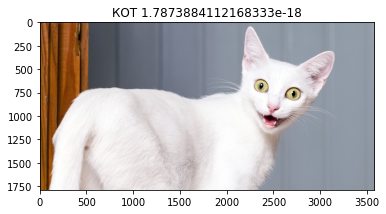

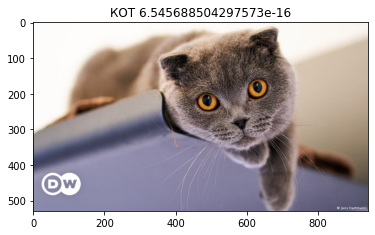

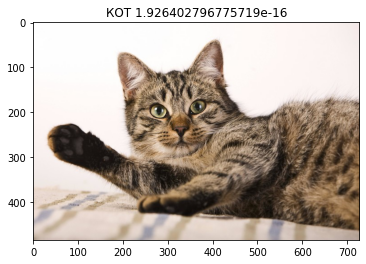

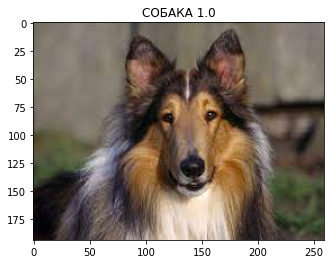

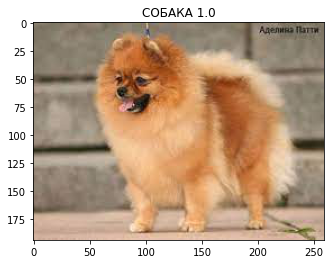

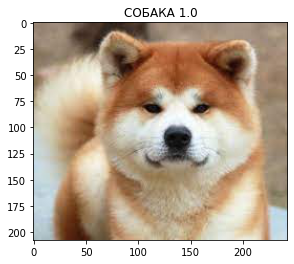

In [7]:
for i in range(6):
  img = load_img(f'{i+1}.jpg')
  img_array = img_to_array(img)
  img_resized, _ = resize_image(img_array, _)
  img_expended = np.expand_dims(img_resized, axis=0)
  prediction = model.predict(img_expended)[0][0]
  pred_label = 'КОТ' if prediction < 0.5 else 'СОБАКА'
  plt.figure()
  plt.imshow(img)
  plt.title(f'{pred_label} {prediction}')